In [10]:
import onnx
import numpy as np
from onnx.backend.test.case.node.resize import interpolate_nd, linear_coeffs

coeffs = lambda x, _: linear_coeffs(x)

data = np.array([[[100, 200]]], dtype=np.float32)
scales = np.array([1.0, 1.0, 1.3], dtype=np.float32)

#    elif coordinate_transformation_mode == 'half_pixel':
#       x_ori = (x + 0.5) / scale_factor - 0.5
# +  elif coordinate_transformation_mode == 'half_pixel_symmetric':
# +     adjustment = int(output_width) / output_width
# +     roi_start = 0
# +     roi_end = input_width
# +     center = (roi_start + roi_end) / 2
# +     roi_start = (roi_start - center) * adjustment + center
# +     x_ori = roi_start + (x + 0.5) / scale_factor - 0.5

output = interpolate_nd(data, coeffs, scale_factors=scales,
                        coordinate_transformation_mode='half_pixel')
output2 = interpolate_nd(data, coeffs, scale_factors=scales,
                         coordinate_transformation_mode='half_pixel_symmetric')

print("half_pixel:\n", output)
print("half_pixel_symmetric:\n", output2)

half_pixel:
 [[[100.         165.38461962]]]
half_pixel_symmetric:
 [[[111.53846013 188.46153987]]]


In [11]:
output_a = interpolate_nd(data[:, ::-1, ::-1], coeffs, scale_factors=scales,
                          coordinate_transformation_mode='half_pixel')
output_b = interpolate_nd(data, coeffs, scale_factors=scales,
                          coordinate_transformation_mode='half_pixel')[:, ::-1, ::-1]
print(output_a)
print(output_b)

[[[200.         134.61538038]]]
[[[165.38461962 100.        ]]]


In [12]:
output2_a = interpolate_nd(data[:, ::-1, ::-1], coeffs, scale_factors=scales,
                          coordinate_transformation_mode='half_pixel_symmetric')
output2_b = interpolate_nd(data, coeffs, scale_factors=scales,
                          coordinate_transformation_mode='half_pixel_symmetric')[:, ::-1, ::-1]
print(output2_a)
print(output2_b)

[[[188.46153987 111.53846013]]]
[[[188.46153987 111.53846013]]]


In [3]:
data = (np.random.rand(4,4,3) * 255).astype('uint8')
scales = np.array([1.0, 0.875, 1], dtype=np.float32)

flipped = data[:, ::-1, :]
resized1 = interpolate_nd(data, coeffs, scale_factors=scales, coordinate_transformation_mode='half_pixel').astype(np.float32)
resized2 = interpolate_nd(data, coeffs, scale_factors=scales, coordinate_transformation_mode='half_pixel_symmetric').astype(np.float32)

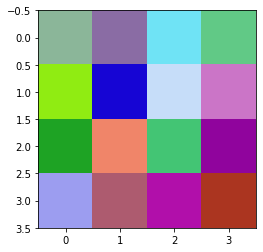

In [4]:
import matplotlib.pyplot as plt
plt.imshow(data)

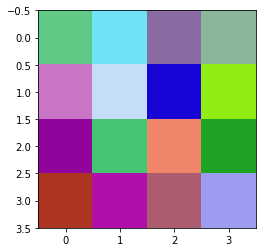

In [5]:
plt.imshow(flipped.astype('uint8'))

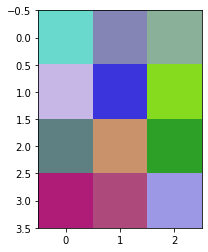

In [6]:
resized_flipped1 = resized1[:, ::-1, :]
plt.imshow(resized_flipped1.astype('uint8'))

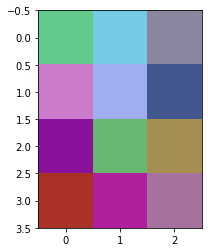

In [7]:
flipped_resized1 = interpolate_nd(flipped, coeffs, scale_factors=scales,
                                  coordinate_transformation_mode='half_pixel')
plt.imshow(flipped_resized1.astype('uint8'))

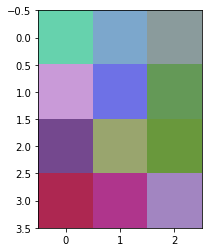

In [8]:
resized_flipped2 = resized2[:, ::-1, :]
plt.imshow(resized_flipped2.astype('uint8'))

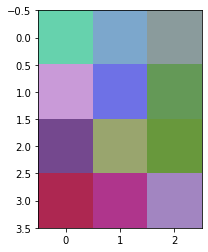

In [9]:
flipped_resized2 = interpolate_nd(flipped, coeffs, scale_factors=scales,
                                  coordinate_transformation_mode='half_pixel_symmetric')
plt.imshow(flipped_resized2.astype('uint8'))